1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [ ]:
Коэффициенты уравнения линейной регрессии можно найти следующим образом:

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [138]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
X

array([ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

In [139]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
y

array([401., 574., 874., 919., 459., 739., 653., 902., 746., 832.])

In [140]:
n = X.shape[0]
n # количество наблюдений

10

In [141]:
a = 0

In [142]:
y_pred = a + b * X

Расчитаем коэффицент линейной регрессии без intercept:

In [143]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

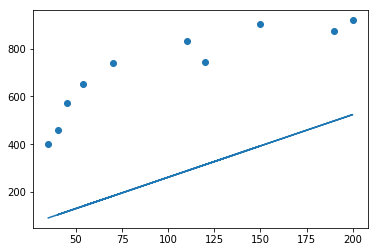

In [144]:
plt.scatter(X, y)
plt.plot(X, y_pred)

Расситаем intercept

In [145]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

Расчитаем коэффицент линейной регрессии с intercept:

In [146]:
y_pred = a + b * X

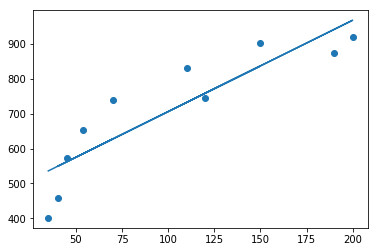

In [147]:
plt.scatter(X, y)
plt.plot(X, y_pred)

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [148]:
X = np.vstack([np.ones((1, 10)), X])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [149]:
y = y.reshape((1, 10))
y

array([[401., 574., 874., 919., 459., 739., 653., 902., 746., 832.]])

In [128]:
def mse_(w1, y=y[0], X=X[1], n=10):
    return np.sum((w1*X - y)**2) / n

In [161]:
mse_(6)

56684.1

In [241]:
alpha = 3*1e-7

In [242]:
w1 = 0.1
w1

0.1

In [243]:
f = 1/n * np.sum((w1*X - y)**2)

In [244]:
f_p = (1/n) * np.sum(2 * (w1*X - y) * X) 

In [277]:
for i in range(100000):
    y_pred = w1*X[1]
    w1 -= alpha * (2/n) * np.sum((y_pred - y) * X[1]) 
    if i%10000 == 0:
        print(f'Iteration: {i}, w1 = {w1}, mse={mse_(w1)}')

Iteration: 0, w1 = 5.8898204201316435, mse=56516.8584157194
Iteration: 10000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 20000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 30000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 40000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 50000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 60000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 70000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 80000, w1 = 5.889820420132689, mse=56516.85841571941
Iteration: 90000, w1 = 5.889820420132689, mse=56516.85841571941


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица значений функции Лапласа испотльзуется при большой выборке, когда имеется или можно посчитать дисперсию, имеется математическое ожидание. Таблица критических точек распределения Стьюдента используется при маленькой выборке, когда не известна сигма. 

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [272]:
def mse2(y, y_pred):
    n = y.shape[1]
    err = np.sum((y - y_pred)**2) / n
    return err

In [273]:
W = np.array([[0.1, 0.1]])

In [274]:
alpha = 3*1e-5

In [276]:
for i in range(200000):
    y_pred = np.dot(W, X)
    W[0, 0] -= alpha * (2/n) * np.sum((y_pred - y)) 
    W[0, 1] -= alpha * (2/n) * np.sum((y_pred - y) * X[1]) 
    if i%20000 == 0:
        print(f'Iteration: {i}, w0 = {W[0, 0]}, w1 = {W[0, 1]}, mse={mse2(y, y_pred)}')

Iteration: 0, w0 = 439.5585716590553, w1 = 2.6545351869818514, mse=6475.825845346539
Iteration: 20000, w0 = 440.7706436010069, w1 = 2.645613801601299, mse=6473.358249229326
Iteration: 40000, w0 = 441.6646409452301, w1 = 2.6390335858888854, mse=6472.015825131302
Iteration: 60000, w0 = 442.3240335306199, w1 = 2.634180164926208, mse=6471.285518236093
Iteration: 80000, w0 = 442.81038685647684, w1 = 2.6306003894187433, mse=6470.888215951387
Iteration: 100000, w0 = 443.169110267703, w1 = 2.627960026511388, mse=6470.672075166643
Iteration: 120000, w0 = 443.4336966885647, w1 = 2.62601255347347, mse=6470.554490041597
Iteration: 140000, w0 = 443.62884975612377, w1 = 2.6245761406141073, mse=6470.490521264734
Iteration: 160000, w0 = 443.7727903244004, w1 = 2.623516674391811, mse=6470.455720907005
Iteration: 180000, w0 = 443.8789576906348, w1 = 2.622735235637036, mse=6470.436788781726
